In [172]:
# Importing Dependences
import math 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [173]:
# Training Data
AAP = yf.Ticker("AAPL")
start = '1980-12-12'
end = "2022-01-01"
AAP = AAP.history(start=start, end=end)
AAP

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27,176.605184,179.926069,176.585249,179.836319,74919600,0.0,0.0
2021-12-28,179.666792,180.833588,178.041250,178.799164,79144300,0.0,0.0
2021-12-29,178.839050,180.135494,177.652305,178.888916,62348900,0.0,0.0


In [174]:
# Getting Testing Data
OOS_Test_Data = yf.Ticker("AAPL")
start = '2022-01-02'
end = "2022-06-01"
OOS_Test_Data = OOS_Test_Data.history(start=start, end=end)
OOS_Test_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,177.343154,182.379332,177.223488,181.511703,104487900,0.0,0
2022-01-04,182.130025,182.439174,178.629624,179.208038,99310400,0.0,0
2022-01-05,179.118295,179.676759,174.161899,174.441132,94537600,0.0,0
2022-01-06,172.227194,174.820082,171.170099,171.529114,96904000,0.0,0
2022-01-07,172.416684,173.663262,170.561776,171.698654,86709100,0.0,0
...,...,...,...,...,...,...,...
2022-05-24,140.809998,141.970001,137.330002,140.360001,104132700,0.0,0
2022-05-25,138.429993,141.789993,138.339996,140.520004,92482700,0.0,0
2022-05-26,137.389999,144.339996,137.139999,143.779999,90601500,0.0,0


Text(0, 0.5, 'Closing Price')

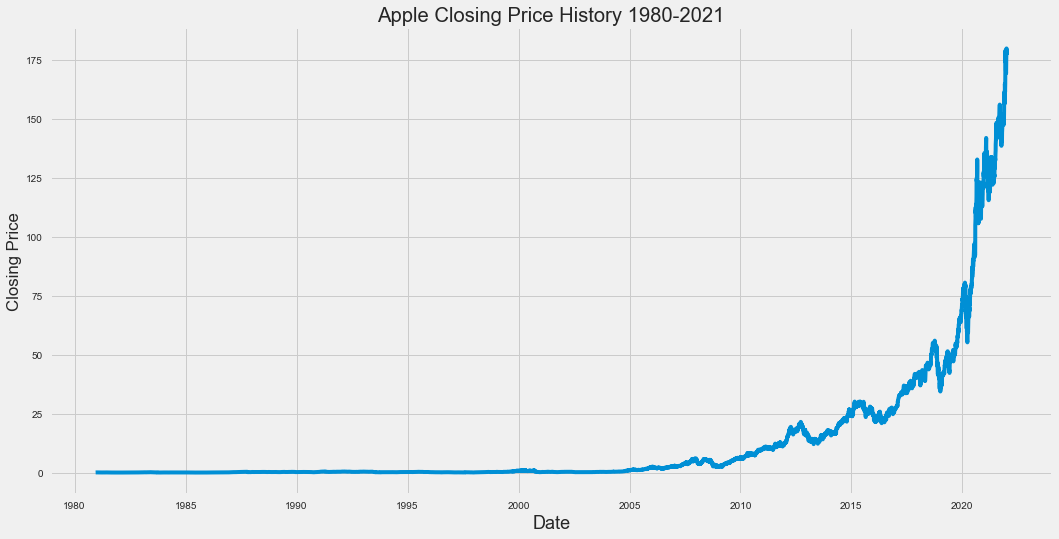

In [175]:
# Plotting Closing Prices
plt.figure(figsize=(16,8))
plt.title('Apple Closing Price History 1980-2021')
plt.plot(AAP['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price')

In [176]:
# Filtering Training Data
data = AAP.filter(['Close'])
data2 = AAP.filter(['Open','Low','High','Volume'])
training_data_y = data.values
training_data_X = data2.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_y = scaler.fit_transform(training_data_y)
scaled_data_y

array([[3.43993671e-04],
       [3.14925639e-04],
       [2.76163747e-04],
       ...,
       [9.94730737e-01],
       [9.88185763e-01],
       [9.84691478e-01]])

In [177]:
y_train = scaled_data_y 
X_train = training_data_X
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [178]:
X_train.shape

(10352, 4, 1)

In [179]:
# LSTM Model 
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [180]:
# Complile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [183]:
# Training the Model 
model.fit(X_train,y_train,batch_size=1,epochs=11)

Epoch 1/11
10352/10352 [==============================] - 67s 6ms/step - loss: 8.0916e-05
Epoch 2/11
10352/10352 [==============================] - 71s 7ms/step - loss: 6.3783e-05
Epoch 3/11
10352/10352 [==============================] - 68s 7ms/step - loss: 7.8335e-05
Epoch 4/11
10352/10352 [==============================] - 74s 7ms/step - loss: 7.6106e-05
Epoch 5/11
10352/10352 [==============================] - 68s 7ms/step - loss: 6.3764e-05
Epoch 6/11
10352/10352 [==============================] - 44s 4ms/step - loss: 6.2870e-05
Epoch 7/11
10352/10352 [==============================] - 43s 4ms/step - loss: 7.0125e-05
Epoch 8/11
10352/10352 [==============================] - 53s 5ms/step - loss: 6.3240e-05
Epoch 9/11
10352/10352 [==============================] - 74s 7ms/step - loss: 6.1591e-05
Epoch 10/11
10352/10352 [==============================] - 82s 8ms/step - loss: 5.7086e-05
Epoch 11/11
10352/10352 [==============================] - 55s 5ms/step - loss: 5.0606e-05


In [184]:
Xtest_data = OOS_Test_Data.filter(['Open','Low','High','Volume'])
ytest_data = OOS_Test_Data.filter(['Close'])
testing_data_X = Xtest_data.values
testing_data_y = ytest_data.values
test_scaled_data_y = scaler.fit_transform(testing_data_y)

In [185]:
X_test = np.array(testing_data_X)
y_test = np.array(testing_data_y)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(103, 4, 1)

In [186]:
# Models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [187]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

12.872757254294978

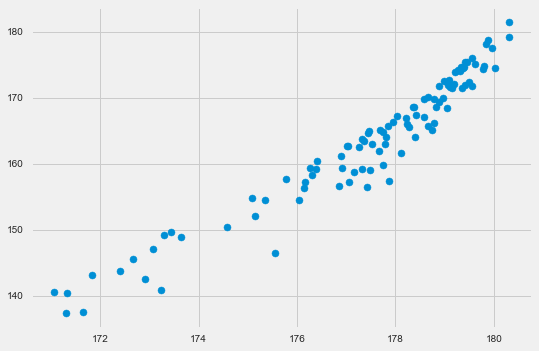

In [189]:
plt.scatter(valid['Predictions'],valid['Close'])

In [190]:
Todays_Test = yf.Ticker("AAPL")
start = '2022-06-01'
end = "2022-06-02"
Todays_Test = Todays_Test.history(start=start, end=end)
Todays_Test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,74143400,0,0


In [191]:
Ttest_data = Todays_Test.filter(['Open','Low','High','Volume'])
yTtest_data = Todays_Test.filter(['Close'])
Ttesting_data_X = Ttest_data.values
Ttesting_data_y = yTtest_data.values
test_scaled_data_y = scaler.fit_transform(Ttesting_data_y)
X_test = np.array(Ttesting_data_X)
y_test = np.array(Ttesting_data_y)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1, 4, 1)

In [205]:
predictions_1 = model.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
predictions_1

array([[149.53914]], dtype=float32)

In [206]:
rmse = np.sqrt(np.mean(predictions_1-y_test)**2)
rmse

0.829132080078125